In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
x = tf.placeholder(tf.float32, shape=[None, 784])
x_image = tf.reshape(x, [-1, 28, 28, 1])

y = tf.placeholder(tf.int64, shape=[None,])

In [6]:
inputs = Conv2D(64, (3, 3), padding='same', input_shape=(-1, 28, 28, 1))(x_image)
inputs = MaxPooling2D(pool_size=(2, 2))(inputs)
inputs = Conv2D(64, kernel_size=(3, 3), activation='relu')(inputs)
inputs = MaxPooling2D(pool_size=(2, 2))(inputs)
inputs = Flatten()(inputs)
inputs = Dense(512, activation='relu')(inputs)
logits = Dense(10)(inputs)
softmax = Activation('softmax')(logits)

In [7]:
matches = tf.equal(tf.argmax(softmax, 1), y)
acc = tf.reduce_mean(tf.cast(matches, tf.float32))

In [8]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y))

In [9]:
train_op = tf.train.AdamOptimizer(0.001).minimize(loss)

In [10]:
init = tf.global_variables_initializer()

In [11]:
saver = tf.train.Saver()

In [12]:
with tf.Session() as sess:
    sess.run(init)
    
    losses = []
    accuracies = []
    epochs = 5
    batch_size = 1000
    
    for i in range(epochs):
        start_time = time.time()
        
        for curr_batch in range(len(x_train) // batch_size):
            from_i = curr_batch * batch_size
            to_i = (curr_batch * batch_size) + batch_size
            
            loss_, _, acc_ = sess.run([loss, train_op, acc],
                                      feed_dict={x: x_train[from_i : to_i].reshape(batch_size, 784), 
                                                 y: y_train[from_i : to_i]})
        losses.append(loss_)
        accuracies.append(acc_)
        print("Epoch No: " + str(i + 1) + " of " + str(epochs))
        print("Loss: " + str(loss_) + " Accuracy: " + str(acc_))
        elapsed_time = time.time() - start_time
        print(time.strftime("%S", time.gmtime(elapsed_time)) + " Seconds")
        print("\n")
        
    saver.save(sess, "./log/CNN_Keras_Graph.ckpt")

Epoch No: 1 of 5
Loss: 0.11205314 Accuracy: 0.98
09 Seconds


Epoch No: 2 of 5
Loss: 0.08360116 Accuracy: 0.987
07 Seconds


Epoch No: 3 of 5
Loss: 0.067129135 Accuracy: 0.988
07 Seconds


Epoch No: 4 of 5
Loss: 0.05670024 Accuracy: 0.99
07 Seconds


Epoch No: 5 of 5
Loss: 0.048519097 Accuracy: 0.99
07 Seconds




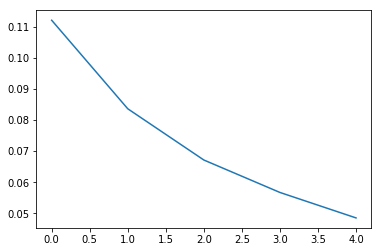

In [13]:
plt.plot(losses)
plt.show()

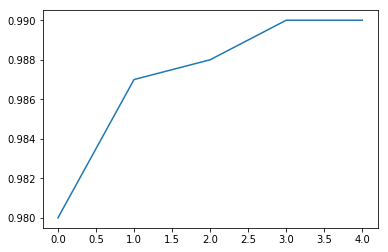

In [14]:
plt.plot(accuracies)
plt.show()

In [15]:
with tf.Session() as sess:
    saver.restore(sess, "./log/CNN_Keras_Graph.ckpt")
    
    y_pred = sess.run(softmax, feed_dict={x: x_test[0: 10].reshape(10, 784)})
    for i in range(10):
        print(str(np.argmax(y_pred[i])) + " - " + str(y_test[i]))

INFO:tensorflow:Restoring parameters from ./log/CNN_Keras_Graph.ckpt
7 - 7
2 - 2
1 - 1
0 - 0
4 - 4
1 - 1
4 - 4
9 - 9
5 - 5
9 - 9
